# Graphs for Presentation

---

## Import libraries & read in data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
subreddits = pd.read_csv('./data/both_subreddits.csv')

In [3]:
eli5 = pd.read_csv('./data/eli5.csv')

In [4]:
advice = pd.read_csv('./data/advice.csv')

## Cleaning up

In [5]:
subreddits['subreddit'] = subreddits['subreddit'].map({'explainlikeimfive': 1, 'Advice': 0})

In [6]:
eli5['title'] = eli5['title'].map(lambda x: x.lower().strip('eli5:'))

In [7]:
subreddits['title'] = subreddits['title'].map(lambda x: x.lower().strip('eli5:'))

## CountVectorizer

In [8]:
# stemmer = PorterStemmer()
# analyzer = CountVectorizer(stop_words = 'english').build_analyzer()

In [9]:
from sklearn.feature_extraction import text

In [10]:
stop_words = text.ENGLISH_STOP_WORDS.union(['does'])

In [11]:
def porter(text):
    return (stemmer.stem(w) for w in analyzer(text))

In [12]:
cvec = CountVectorizer(stop_words = stop_words)
token_subreddit = pd.DataFrame(cvec.fit_transform(subreddits['title']).todense(),
                               columns=cvec.get_feature_names())
token_subreddit.head()

# code from https://github.com/payalchodha/Reddit-Post-Classification/blob/master/model%20and%20insights.ipynb

,00,000,000km,00pm,10,100,1000,1000cc,1000th,100gb,...,zeroes,zeros,zipfs,zombies,zon,zone,zoned,zoom,zoos,êtr
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Top Common Words in Both Subreddits

In [13]:
# get count of top-occurring words

# empty dictionary
top_words = {}

# loop through columns
for i in token_subreddit.columns:
    # save sum of each column in dictionary
    top_words[i] =  token_subreddit[i].sum()
    
# top_words to dataframe sorted by highest occurance
most_freq = pd.DataFrame(sorted(top_words.items(), key = lambda x: x[1], reverse = True))

In [14]:
most_freq.head()

,0,1
0,like,511
1,people,476
2,help,431
3,don,426
4,know,422


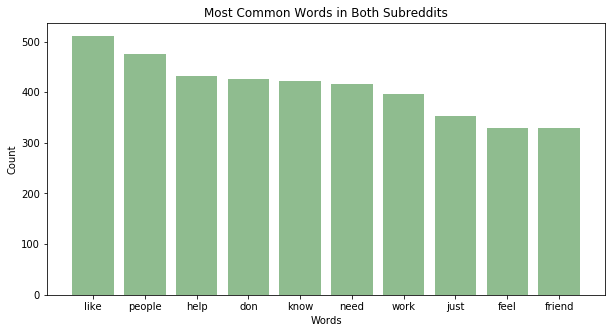

In [15]:
plt.figure(figsize = (10, 5))

# visualize top 10 words
plt.bar(most_freq[0][:10], most_freq[1][:10], color='darkseagreen')
plt.title('Most Common Words in Both Subreddits')
plt.xlabel('Words')
plt.ylabel('Count');

In [16]:
cvec_eli5 = CountVectorizer(stop_words = stop_words)
token_eli5 = pd.DataFrame(cvec.fit_transform(eli5['title']).todense(),
                               columns=cvec.get_feature_names())
token_eli5.head()

# code from https://github.com/payalchodha/Reddit-Post-Classification/blob/master/model%20and%20insights.ipynb

,00,000,000km,00pm,10,100,1000,1000cc,1000th,100gb,...,zed,zee,zero,zeroes,zeros,zipfs,zone,zoom,zoos,êtr
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Top Words in r/explainlikeimfive

In [17]:
# get count of top-occurring words

# empty dictionary
top_words = {}

# loop through columns
for i in token_eli5.columns:
    # save sum of each column in dictionary
    top_words[i] =  token_eli5[i].sum()
    
# top_words to dataframe sorted by highest occurance
eli5_most_freq = pd.DataFrame(sorted(top_words.items(), key = lambda x: x[1], reverse = True))

In [18]:
eli5_most_freq.head()

,0,1
0,people,365
1,like,325
2,work,284
3,just,177
4,make,166


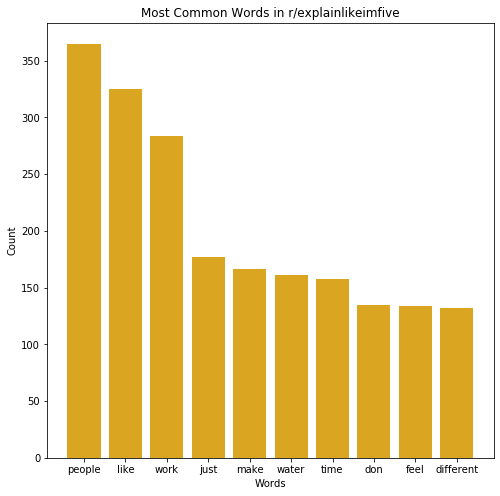

In [19]:
plt.figure(figsize = (8, 8))

# visualize top 10 words
plt.bar(eli5_most_freq[0][:10], eli5_most_freq[1][:10], color='goldenrod')
plt.title('Most Common Words in r/explainlikeimfive')
plt.xlabel('Words')
plt.ylabel('Count');

## Top Words for r/Advice

In [20]:
def common_words(subreddit):
    cvec = CountVectorizer(stop_words = stop_words)
    tokenized = pd.DataFrame(cvec.fit_transform(subreddit['title']).todense(),
                               columns=cvec.get_feature_names())

    # count of top-occurring words
    # empty dictionary
    top_words = {}

    # loop through columns
    for i in tokenized.columns:
        # save sum of each column in dictionary
        top_words[i] =  tokenized[i].sum()

    # top_words to dataframe sorted by highest occurance
    most_freq = pd.DataFrame(sorted(top_words.items(), key = lambda x: x[1], reverse = True))
    
    return most_freq


In [21]:
advice_common = common_words(advice)

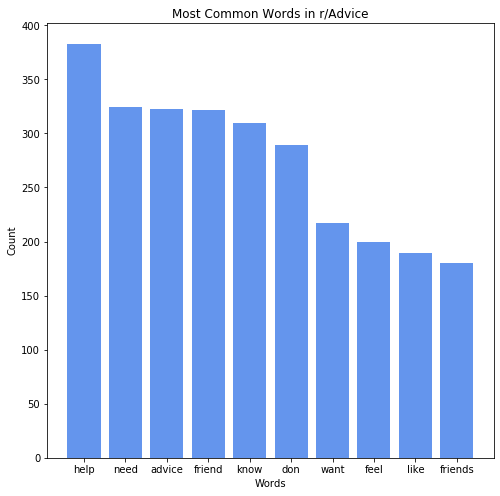

In [22]:
plt.figure(figsize = (8, 8))

# visualize top 10 words
plt.bar(advice_common[0][:10], advice_common[1][:10], color='cornflowerblue')
plt.title('Most Common Words in r/Advice')
plt.xlabel('Words')
plt.ylabel('Count');